In [2]:
!pip install Pillow

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob
import librosa as lr
import librosa.display
import soundfile as sf
import IPython.display as ipd
from scipy.io.wavfile import write
import pandas as pd
import skimage.io
import os

In [4]:
#Normal Short time Fourier Transform Loading and reconstruction
def print_plot_play(x, Fs, text=''):
    
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    ipd.display(ipd.Audio(data=x, rate=Fs))

    


129.6052
<class 'numpy.ndarray'>
test1 Fs = 22050, x.shape = (109568,), x.dtype = float32


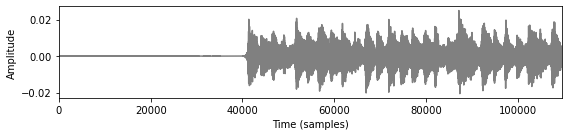

In [5]:
import PIL
from PIL import Image
from numpy import asarray
n_fft = 2048
hop_length = 512
n_mels = 512
  
    
  

[y, sr] = librosa.load(r"C:\Users\jayoj\Documents\GT\SML\Data\Test\NewsTest2.wav",duration=4.99)
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
print(S.max())
S_DB = librosa.power_to_db(S, ref=np.max)
S_DB=np.uint8(S_DB)
print(type(S_DB))
#mel
S_DB=np.int8(S_DB)
data= librosa.db_to_power(S_DB)
y=librosa.feature.inverse.mel_to_audio(data, n_fft=n_fft, hop_length=hop_length)
print_plot_play(x=y, Fs=22050, text='test1')


3.5597615
-20.723267
test1 Fs = 22050, x.shape = (109568,), x.dtype = float64


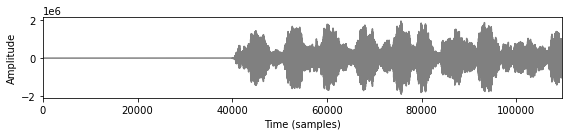

In [6]:
''' # preprocess method (Spectrogram)
    newFile=c.replace(".wav","_Spec.png")
    D = np.abs(librosa.stft(y, n_fft=n_fft,  hop_length=hop_length))
    s=0
    if not (os.path.exists(newFile)):
        mutex.acquire()
        
        mels = numpy.log(D + 1e-9) # add small number to avoid log(0)

        # min-max scale to fit inside 8-bit range
        img = scale_minmax(mels, 0, 255).astype(numpy.uint8)
        img = numpy.flip(img, axis=0) # put low frequencies at the bottom in image
        img = 255-img # invert. make black==more energy

        # save as PNG
        skimage.io.imsave(newFile, img)

        mutex.release()
        s=1'''        
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def unscale_minmax(X_scaled, min=0.0, max=1.0):
    X_std=(X_scaled-min)/(max - min)
    X=(X_std/(X_scaled.max() - X_scaled.min()))+X_scaled.min()
    return X



[y, sr] = librosa.load(r"C:\Users\jayoj\Documents\GT\SML\Data\Test\NewsTest2.wav",duration=4.99)
D = np.abs(librosa.stft(y, n_fft=n_fft,  hop_length=hop_length))
s=0

mels = np.log(D + 1e-9) # add small number to avoid log(0)
# min-max scale to fit inside 8-bit range
print(mels.max())
print(mels.min())
img = scale_minmax(mels, 0, 255).astype(np.uint8)
img = np.flip(img, axis=0) # put low frequencies at the bottom in image
img = 255-img # invert. make black==more energy

#Specto
#image = Image.open(r"C:\Users\jayoj\Documents\GT\SML\Data\Full_PP_Data_ori\Mix\t001_mixture00_ori_Spec.png")
image = img
#image = asarray(image)
image = 255 - image
image = np.flip(image,axis=0)

#print(image.max())

image = scale_minmax(image, -22,22)
image=np.float64(image)
image=np.exp(image)-1e-9


#image=image*1
#image=np.int8(image)

y=librosa.core.istft(image, hop_length=hop_length)

print_plot_play(x=y, Fs=22050, text='test1')




test1 Fs = 22050, x.shape = (109568,), x.dtype = float32


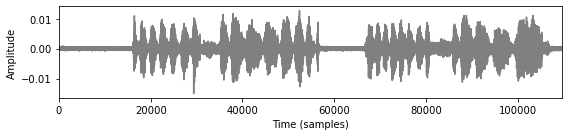

In [7]:
#mel
image = Image.open(r"C:\Users\jayoj\Documents\GT\SML\Data\Full_PP_Data_ori\Mix\t001_mixture00_noise_Mel.png")
data = asarray(image)
data = np.int8(data)
data = librosa.db_to_power(data)
y=librosa.feature.inverse.mel_to_audio(data, n_fft=n_fft, hop_length=hop_length)
print_plot_play(x=y, Fs=22050, text='test1')

In [67]:
#"C:\Users\jayoj\Documents\GT\SML\Data\Full_PP_Data_ori\Mix\t001_mixture00_noise_Spec.png"


y, sr = librosa.load(r"C:\Users\jayoj\Downloads\1969.wav",duration=4.99)

DB = librosa.stft(y, n_fft=n_fft,  hop_length=hop_length)
DB = librosa.amplitude_to_db(D,ref=1)
#DB= np.float32(DB)
DB = scale_minmax(DB, 0,255)

#save as PNG
skimage.io.imsave("Test12.png", np.uint16(DB))

#Power Spec
image = Image.open("Test12.png")
data = asarray(image)
data = np.float32(data)
data = scale_minmax(data, -1,1)

y=librosa.core.istft(data, hop_length=hop_length)

print_plot_play(x=y, Fs=22050, text='test1')

        #DB = librosa.amplitude_to_db(D, ref=np.max)
        #mutex.acquire()

        # save as PNG
        #skimage.io.imsave(newFile, np.uint8(DB))
        #mutex.release()

C:\Users\jayoj\anaconda3\lib\site-packages\librosa\core\spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(
<ipython-input-67-2eb620a87ef7>:12: UserWarning: Test12.png is a low contrast image
  skimage.io.imsave("Test12.png", np.uint16(DB))


TypeError: unsupported operand type(s) for /: 'int' and 'function'

In [30]:
print(np.max)

<function amax at 0x0000018DEB5CE430>


-1462784.3550730054
1608574.557204074
test1 Fs = 22050, x.shape = (109568,), x.dtype = float64


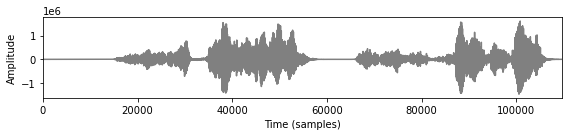

In [10]:
#Specto
image = Image.open(r"C:\Users\jayoj\Documents\GT\SML\Data\Full_PP_Data_ori\Mix\t001_mixture00_ori_Spec.png")
image = asarray(image)
image = 255 - image
image = np.flip(image,axis=0)

#print(image.max())

image = scale_minmax(image, -22,22)
image=np.float64(image)
image=np.exp(image)-1e-9


#image=image*1
#image=np.int8(image)

y=librosa.core.istft(image, hop_length=hop_length)


#print(y.min())
#print(y.max())
print_plot_play(x=y, Fs=22050, text='test1')

In [175]:
np.exp(np.log(3+1e-9))-1e-9

3.0000000000000004